In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
import tensorflow as tf
import numpy as np

### 1. mnist 데이터 읽어오기 

In [5]:
input_data

<module 'tensorflow.examples.tutorials.mnist.input_data' from '/home/ubuntu/miniconda3/envs/py3/lib/python3.6/site-packages/tensorflow/examples/tutorials/mnist/input_data.py'>

In [6]:
mnist = input_data.read_data_sets("./", one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


### 2. MNIST 데이터 형태 출력

In [7]:
for i in range(len(mnist.train.images[0])):
    if(mnist.train.images[5][i] > 0):
        print("*",end='')
    else:
        print(" ", end='')
  
    if(i % 28 == 0):
        print('\n')

 

                            

                            

                            

                            

                            

              ********      

            **********      

            ***********     

          *************     

          *****    ***      

          ****   ****       

          ***  ******       

          ***  ******       

          **********        

          ********          

         ********           

       ***********          

      ******** ***          

     *******   ****         

     ****      ****         

     ***      *****         

     *****  *******         

      ************          

      ***********           

        ******              

                            

                            

                           

### 3. MNIST Softmax 모델 구현(BY MYSELF)

In [8]:
import time

In [9]:
#1. 데이터 정의
#images train 데이터 55000개 784열
print(np.shape(mnist.train.images))
print(np.shape(mnist.train.labels))

(55000, 784)
(55000, 10)


In [10]:
train_x = mnist.train.images
train_y = mnist.train.labels

test_x = mnist.test.images
test_y = mnist.test.labels

In [11]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

In [12]:
#2. 가설 설정
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [13]:
#3. 비용 함수
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))

In [14]:
#4. optimizer 정의
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [15]:
#5. prediction 및 Accuracy 정의
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [16]:
#6. 학습
start_time = time.time()

sess = tf.Session()

#Initialize Tensorflow variables
sess.run(tf.global_variables_initializer())

#학습을 총 6번 한다
for step in range(200):
    cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: train_x, Y: train_y})

    if step % 10 == 0: 
        print(step, cost_val)

0 15.0543
10 5.92453
20 3.73836
30 2.78782
40 2.28071
50 1.97155
60 1.76355
70 1.61311
80 1.4984
90 1.40751
100 1.33336
110 1.27146
120 1.21881
130 1.17332
140 1.13349
150 1.09824
160 1.06674
170 1.03837
180 1.01265
190 0.989179


In [17]:
#validation predict
print("Prediction: ", sess.run(prediction, feed_dict={X: test_x}))

#calculate the accuracy
print("Accuracy: ", sess.run(accuracy, feed_dict={X: test_x, Y: test_y}))

print("--- %s seconds ---" % (time.time() - start_time))

Prediction:  [7 2 1 ..., 4 8 6]
Accuracy:  0.8083
--- 365.10828924179077 seconds ---


### Batch & Epoch 사용하지 않을 때 결과

내가 짠 것은 55000개 이미지를 한 번에 학습시켰다.<br/>
이를 총 200번 반복했다. 즉 200번의 학습이 이루어졌다.<br/>
그리고 이를 통해서 마지막 5000개의 test에 대해서 예측을 했다.<br/>

<b>그 결과 총 365초가 걸려서 80%의 정확도가 나왔다.</b>

### 4. MNIST SOFTMAX 구현(김성훈)

<img src="./photo/epoch.png">

In [18]:
import tensorflow as tf
import numpy as np

In [19]:
import matplotlib.pyplot as plt

In [20]:
#1. 데이터 저장 및 변수 생성
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [21]:
#2. 가설 설정
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
  
#3. 비용함수
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

#4. optimizer 정의
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

#5. prediction tensor 정의
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [22]:
# parameters
training_epochs = 15
batch_size = 100

epoch: 전체 데이터 셋을 몇 회 학습시킬 것인가<br/>
batch_size: 한 번에 몇 개의 데이터씩 학습시킬 것인가<br/>
number of iterations: 1 epoch을 batch_size 학습하기 위해서 필요한 횟수

In [ ]:
import random

Epoch: 0001 cost = 1.277526289
Epoch: 0002 cost = 0.625996734
Epoch: 0003 cost = 0.519626383
Epoch: 0004 cost = 0.473059681
Epoch: 0005 cost = 0.434620157
Epoch: 0006 cost = 0.409511980
Epoch: 0007 cost = 0.390970582
Epoch: 0008 cost = 0.374383657
Epoch: 0009 cost = 0.363801742
Epoch: 0010 cost = 0.355359032
Epoch: 0011 cost = 0.342417681
Epoch: 0012 cost = 0.339030000
Epoch: 0013 cost = 0.326893819
Epoch: 0014 cost = 0.326254592
Epoch: 0015 cost = 0.319288550
Learning finished
Accuracy:  0.915
--- 53.34838795661926 seconds ---
Label:  [4]
Prediction:  [4]


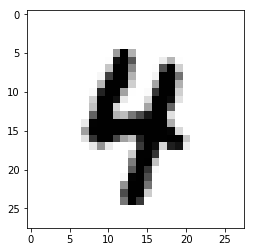

In [29]:
start_time = time.time()

with tf.Session() as sess:

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle(15회 반복)
    for epoch in range(training_epochs):
        avg_cost = 0
        
        #number of iterations
        total_batch = int(mnist.train.num_examples / batch_size)
                
        #1epoch 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))
    
    print("--- %s seconds ---" % (time.time() - start_time))
    
    #시각화
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()


### Batch & Epoch 사용한 결과

batch_size를 100으로 해서 100개의 이미지씩 학습을 시켰다.<br/>
1 epoch에서는 55000/100 = 550번 학습을 한다.<br/>
15 epoch에서 총 550*15 = 7150번의 학습을 한다.<br/>

<b>그 결과 총 63초가 걸려서 91%의 정확도가 나왔다.</b>

### 결과 비교

내가 한 것은 총 55000*200 = 1100000의 이미지를 학습했다.<br/>
김성훈 교수가 한 것은 총 55000*15 = 715000의 이미지를 학습했다.<br/>
하지만 BATCH & EPOCH 사용함으로써 시간도 더 적게 걸리고 정확도도 더 좋았다.